# Soft kompjuting

## Vežba 1 - Digitalna slika, computer vision, scikit-image

### scikit-image

Python biblioteka za rad sa digitalnim slikama. Dokumentacija na [http://scikit-image.org/](http://scikit-image.org/). U Python-u, ovaj paket se refencira sa ```skimage```.

### matplotlib

Python biblioteka za plotovanje grafika, slika, histograma... Dokumentacija na [http://matplotlib.org/](http://matplotlib.org/).

### Učitavanje slike
Koristiti komandu ```imread``` u ```skimage.io``` paketu.

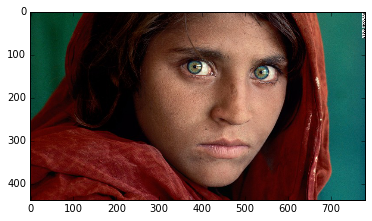

In [317]:
import matplotlib.pyplot as plt  # za prikaz slika, grafika, itd.
%matplotlib inline
# %matplotlib inline je komanda za prikaz slika i grafika unutar notebook-a (ne koristiti u običnim skriptama!!!)

import numpy as np
from skimage.io import imread

img = imread('images/girl.jpg')  # img je Numpy array
plt.imshow(img)  # imshow je funkcija za prikaz slike (u formatu Numpy array-a)

### Prikazivanje dimenzija slike

In [318]:
img.shape  # shape je property Numpy array-a za prikaz dimenzija

(438L, 780L, 3L)

Obratiti pažnju da slika u boji ima 3 komponente za svaki piksel na slici - R (red), G (green) i B (blue).
![images/cat_rgb.png](images/cat_rgb.png)

In [319]:
img

array([[[  8,  68,  40],
        [  7,  70,  41],
        [  7,  70,  41],
        ..., 
        [ 27,  93,  92],
        [ 29, 101, 100],
        [ 26, 100,  99]],

       [[ 11,  71,  43],
        [ 10,  70,  42],
        [  9,  69,  41],
        ..., 
        [ 39, 101, 100],
        [ 23,  91,  90],
        [ 25,  97,  94]],

       [[  2,  61,  33],
        [  9,  68,  40],
        [ 15,  74,  46],
        ..., 
        [ 34,  89,  86],
        [ 29,  94,  90],
        [ 30, 101,  97]],

       ..., 
       [[ 74,   6,   5],
        [ 74,   4,   2],
        [ 75,   4,   2],
        ..., 
        [ 10,  94, 104],
        [  8,  92, 102],
        [  5,  92, 101]],

       [[ 76,   5,   3],
        [ 78,   4,   3],
        [ 79,   3,   3],
        ..., 
        [ 11,  95, 106],
        [  9,  93, 104],
        [  4,  91, 101]],

       [[ 79,   3,   3],
        [ 81,   3,   3],
        [ 82,   2,   1],
        ..., 
        [  7,  91, 102],
        [  6,  90, 101],
        [  2,  88,

Primetite da je svaki element matrice **uint8** (unsigned 8-bit integer), odnosno celobroja vrednost u interval [0, 255].

In [320]:
img.dtype

dtype('uint8')

### Osnovne operacije pomoću Numpy

Predstavljanje slike kao Numpy array je vrlo korisna stvar, jer omogućava jednostavnu manipulaciju i izvršavanje osnovih operacija nad slikom.

#### Isecanje (crop)

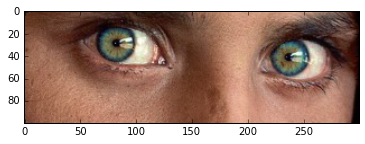

In [321]:
img_crop = img[100:200, 300:600]  # prva koordinata je po visini (formalno red), druga po širini (formalo kolona)
plt.imshow(img_crop)

#### Okretanje (flip)

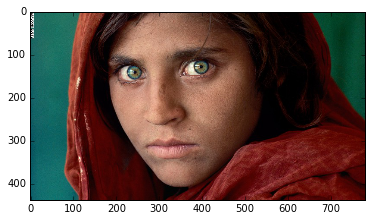

In [322]:
img_flip_h = img[:, ::-1]  # prva koordinata ostaje ista, a kolone se uzimaju unazad
plt.imshow(img_flip_h)

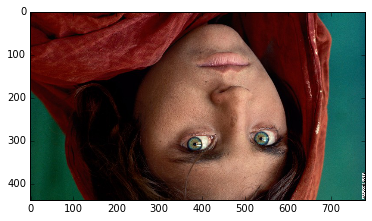

In [323]:
img_flip_v = img[::-1, :]  # druga koordinata ostaje ista, a redovi se uzimaju unazad
plt.imshow(img_flip_v)

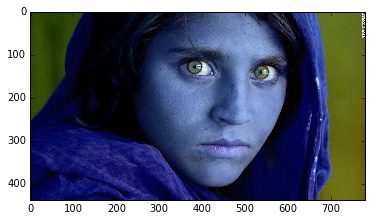

In [324]:
img_flip_c = img[:, :, ::-1]  # možemo i izmeniti redosled boja (RGB->BGR), samo je pitanje koliko to ima smisla
plt.imshow(img_flip_c)

Uuu, avatar! :)

#### Invertovanje

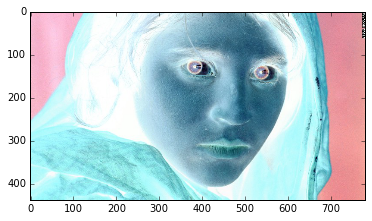

In [325]:
img_inv = 255 - img  # ako su pikeli u intervalu [0,255] ovo je ok, a ako su u intervalu [0.,1.] onda bi bilo 1. - img
plt.imshow(img_inv)

### Konvertovanje iz RGB u "grayscale"

Konvertovanjem iz RGB modela u nijanse sivih (grayscale) se gubi informacija o boji piksela na slici, ali sama slika postaje mnogo lakša za dalju obradu.

Ovo se može uraditi na više načina:
1. **Srednja vrednost** RGB komponenti - najjednostavnija varijanta $$ G = \frac{R+G+B}{3} $$
2. **Metod osvetljenosti** - srednja vrednost najjače i najslabije boje $$ G = \frac{max(R,G,B) + min(R,G,B)}{2} $$
3. **Metod perceptivne osvetljenosti** - težinska srednja vrednost koja uzima u obzir ljudsku percepciju (npr. najviše smo osetljivi na zelenu boju, pa to treba uzeti u obzir)$$ G = 0.21*R + 0.72*G + 0.07*B $$

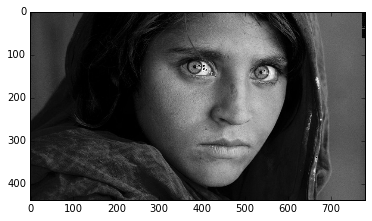

In [326]:
# implementacija metode perceptivne osvetljenosti
def my_rgb2gray(img_rgb):
    img_gray = np.ndarray((img_rgb.shape[0], img_rgb.shape[1]))  # zauzimanje memorije za sliku (nema trece dimenzije)
    img_gray = 0.21*img_rgb[:, :, 0] + 0.77*img_rgb[:, :, 1] + 0.07*img_rgb[:, :, 2]
    img_gray = img_gray.astype('uint8')  # u prethodnom koraku smo mnozili sa float, pa sada moramo da vratimo u [0,255] opseg
    return img_gray

img_gray = my_rgb2gray(img)
plt.imshow(img_gray, 'gray')

Ipak je najbolje se držati implementacije u **scikit-image** biblioteci :).

In [327]:
from skimage.color import rgb2gray
img_gray = rgb2gray(img)

In [328]:
img_gray.shape

(438L, 780L)

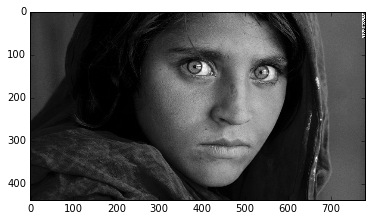

In [329]:
plt.imshow(img_gray, 'gray')  # kada se prikazuje slika koja nije RGB, obavezno je staviti 'gray' kao drugi parametar

In [330]:
img_gray

array([[ 0.2087498 ,  0.2138102 ,  0.2138102 , ...,  0.30942314,
         0.33579569,  0.33020745],
       [ 0.22051451,  0.21659294,  0.21267137, ...,  0.34412902,
         0.29991333,  0.31954392],
       [ 0.18213216,  0.20958314,  0.23311255, ...,  0.30233804,
         0.3133298 ,  0.33578078],
       ..., 
       [ 0.07991333,  0.07345412,  0.07428745, ...,  0.3014549 ,
         0.29361176,  0.29082902],
       [ 0.07820902,  0.0770702 ,  0.07509804, ...,  0.30565922,
         0.29781608,  0.2871902 ],
       [ 0.07509804,  0.07676471,  0.07422706, ...,  0.28997294,
         0.28605137,  0.27710706]])

Ovde obratite pažnju da kada slika metodom ```rgb2gray``` konvertuje u **grayscale** da su vrednost skalirane na realni interval [0, 1].

### Binarna slika

Slika čiji pikseli imaju samo dve moguće vrednosti: crno i belo. U zavisnosti da li interval realan (float32) ili celobrojan (uint8), ove vrednosti mogu biti {0,1} ili {0,255}.

U binarnoj slici često izdvajamo ono što nam je bitno (**foreground**), od ono što nam je nebitno (**background**). Formalnije, ovaj postupak izdvajanja bitnog od nebitnog na slici nazivamo **segmentacija**.

Najčešći način dobijanja binarne slike je korišćenje nekog praga (**threshold**), pa ako je vrednost piksela veća od zadatog praga taj piksel dobija vrednost 1, u suprotnom 0. Postoji više tipova threshold-ovanja:

1. Globalni threshold - isti prag se primenjuje na sve piksele
2. Lokalni threshold - različiti pragovi za različite delove slike
3. Adaptivni threshold - prag se ne određuje ručno (ne zadaje ga čovek), već kroz neki postupak. Može biti i globalni i lokalni.

#### Globalni threshold

Kako izdvojiti npr. samo lice?

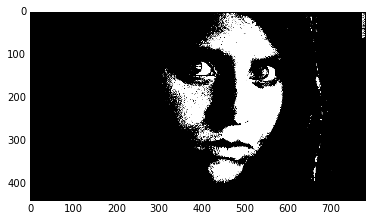

In [331]:
img_tr = img_gray > 0.5  # svi piskeli koji su veci od 0.5 ce dobiti vrednost True, tj. 1, i obrnuto
plt.imshow(img_tr, 'gray')

Međutim ovo neće raditi na slikama gde je osvetljenje promenljivo...

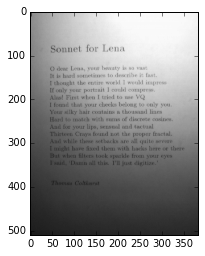

In [332]:
img_sonnet = imread('images/sonnet.png')
plt.imshow(img_sonnet)

Kako izdvojiti samo slova?

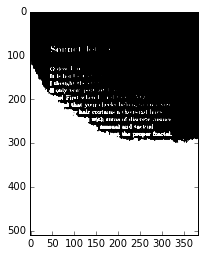

In [336]:
img_sonnet_gray = rgb2gray(img_sonnet)
img_sonnet_tr = img_sonnet_gray > 0.5
plt.imshow(1-img_sonnet_tr, 'gray')  # oduzima se od 1 jer je belo foreground, crno background

#### Lokalni threshold

Ide se po slici deo po deo (npr. kvadrat 10x10) i računa se **srednja vrednost piksela unutar tog kvadrata**, pa ako je centralni piksel unutar tog kvadrata veći od izračunate srednje vrednosti dobija vrednost 1, u suprotnom 0. Dakle, vrednost praga je ovde u suštini 0.5.

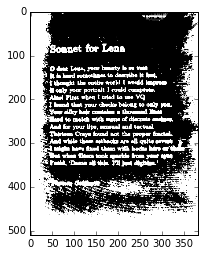

In [339]:
from skimage.filters.rank import threshold

local_size = np.ones((111, 111), dtype='uint8')  # kvardat 111x111
img_sonnet_tr_loc = threshold(img_sonnet_gray, local_size)
plt.imshow(1-img_sonnet_tr_loc, 'gray')  # oduzima se od 1 jer je belo foreground, crno background

Ovo je već bolje, ali je nephodno unapred znati veličinu kvadrata.

#### Lokalni Otsu threshold

Lokalni treshold, ali se koristi **Otsu metoda** ([https://en.wikipedia.org/wiki/Otsu%27s_method](https://en.wikipedia.org/wiki/Otsu%27s_method)) za određivanje vrednosti praga.

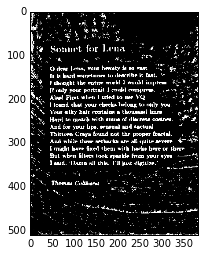

In [340]:
from skimage.filters.rank import otsu

local_size = np.ones((25, 25), dtype='uint8')  # kvardat 110x110

# otsu metoda radi samo sa slikama sa pikselima u celobrojnom intervalu [0, 255] = uint8
img_sonnet_gray = (img_sonnet_gray * 255).astype('uint8')  # skaliranje sa [0.,1.] na [0,255]

threshold_otsu = otsu(img_sonnet_gray, local_size)
img_sonnet_tr_loc_otsu = (img_sonnet_gray >= threshold_otsu).astype('float32')  # vracamo na [0.,1.] interval

plt.imshow(1-img_sonnet_tr_loc_otsu, 'gray')  # oduzima se od 255 jer je belo foreground, crno background

Još bolje nego prethodno, ali se izvršava znatno duže, i teško je odrediti veličinu kvadrata.

### JOŠ METODA ZA THRESHOLD

Prikazane su samo neke osnovne metode za binarizaciju (threshold) slike, a postoji ih sijaset. **scikit-image** biblioteka nudi dosta drugih metoda koje treba pogledati i isprobati - [http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=otsu#threshold-adaptive](http://scikit-image.org/docs/dev/api/skimage.filters.html?highlight=otsu#threshold-adaptive) (kada otvorite ovaj link pa sve što počinje sa **threshold_**).

### Histogram

Možemo koristiti **histogram**, koji će nam dati informaciju o distribuciji osvetljenosti piksela.

Vrlo koristan kada je potrebno odrediti prag za globalni threshold.

In [341]:
from skimage.exposure import histogram
hist = histogram(img_gray, nbins=1000)

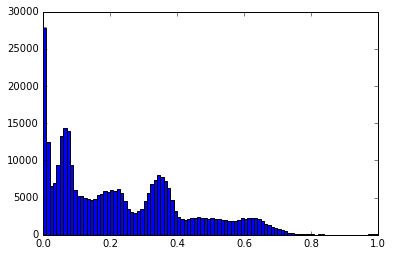

In [342]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(img_gray.flatten(), bins=100)

Pretpostavimo da su vrednosti piksela lica između 0.4 i 0.8.

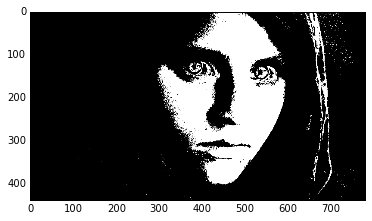

In [343]:
img_tr = (img_gray > 0.4).astype('float32') * (img_gray < 0.8).astype('float32')  # mora konvert u float da bi se mogli pomnožiti
plt.imshow(img_tr, 'gray')

### Konverovanje iz "grayscale" u RGB

Ovo je zapravo trivijalna operacija koja za svaki kanal boje (RGB) napravi kopiju od originalne grayscale slike. Ovo je zgodno kada nešto što je urađeno u grayscale modelu treba iskoristiti zajedno sa RGB slikom.

In [344]:
from skimage.color import gray2rgb
img_tr_rgb = gray2rgb(img_tr).astype('uint8')

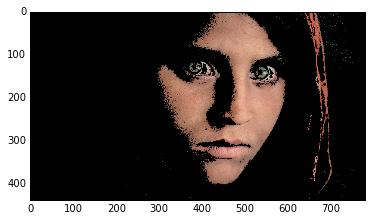

In [345]:
plt.imshow(img*img_tr_rgb)  # množenje originalne RGB slike i slike sa izdvojenim pikselima lica

### Morfološke operacije

Veliki skup operacija za obradu digitalne slike, gde su te operacije zasnovane na oblicima, odnosno **strukturnim elementima**. U morfološkim operacijama, vrednost svakog piksela rezultujuće slike se zasniva na poređenju odgovarajućeg piksela na originalnoj slici sa svojom okolinom. Veličina i oblik ove okoline predstavljaju strukturni element.

[http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology](http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

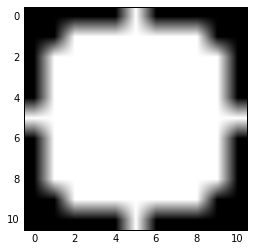

In [346]:
from skimage.morphology import square, diamond, disk  # strukturni elementi

str_elem = disk(5)  # parametar je poluprecnik diska

plt.imshow(str_elem, 'gray')

#### Dilacija

Morfološka dilacija postavlja vrednost piksela rez. slike na ```(i,j)``` koordinatama na **maksimalnu** vrednost svih piksela u okolini ```(i,j)``` piksela na orig. slici.

U suštini dilacija uvećava regione belih piksela, a umanjuje regione crnih piksela. Zgodno za izražavanje regiona od interesa.

![images/dilation.gif](images/dilation.gif)

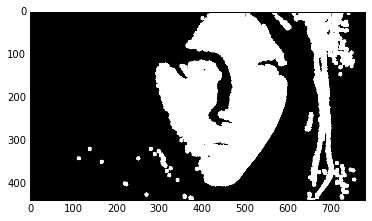

In [347]:
from skimage.morphology import dilation

img_tr_dil = dilation(img_tr, selem=str_elem)
plt.imshow(img_tr_dil, 'gray')

#### Erozija

Morfološka erozija postavlja vrednost piksela rez. slike na ```(i,j)``` koordinatama na **minimalnu** vrednost svih piksela u okolini ```(i,j)``` piksela na orig. slici.

U suštini erozija umanjuje regione belih piksela, a uvećava regione crnih piksela. Često se koristi za uklanjanje šuma (u vidu sitnih regiona belih piksela).

![images/erosion.gif](images/erosion.gif)

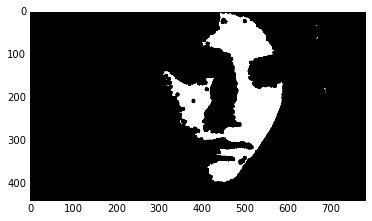

In [348]:
from skimage.morphology import erosion

img_tr_er = erosion(img_tr, selem=str_elem)
plt.imshow(img_tr_er, 'gray')

#### Otvaranje i zatvaranje

**```otvaranje = erozija + dilacija```**, uklanjanje šuma erozijom i vraćanje originalnog oblika dilacijom.

**```zatvaranje = dilacija + erozija```**, zatvaranje sitnih otvora među belim pikselima

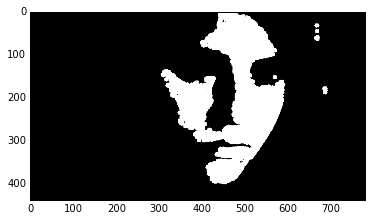

In [349]:
from skimage.morphology import opening, closing

img_tr_open = opening(img_tr, selem=str_elem)
plt.imshow(img_tr_open, 'gray')

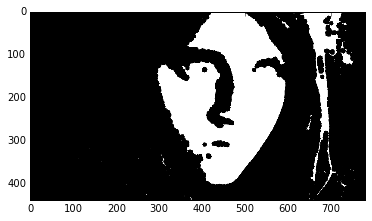

In [350]:
img_tr_close = closing(img_tr, selem=str_elem)
plt.imshow(img_tr_close, 'gray')

### Regioni i izdvajanje regiona

Najjednostavnije rečeno, region je skup međusobno povezanih belih piksela. Kada se kaže povezanih, misli se na to da se nalaze u neposrednoj okolini. Razlikuju se dve vrste povezanosti: tzv. **4-connectivity** i **8-connectivity**:

![images/48connectivity.png](images/48connectivity.png)

Postupak kojim se izdvajanju/obeležavaju regioni se naziva **connected components labelling**. Ovo ćemo primeniti na problemu izdvajanja barkoda.

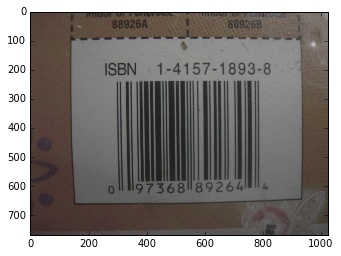

In [351]:
img_barcode = imread('images/barcode.jpg')
plt.imshow(img_barcode)

Recimo da želimo da izdvojimo samo linije barkoda sa slike.
Za početak, uradimo neke standardne operacije, kao što je konvertovanje u grayscale i adaptivni threshold.

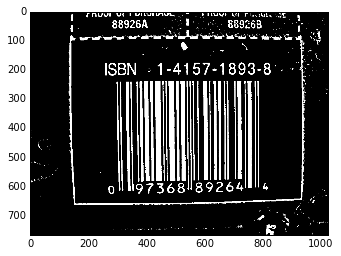

In [352]:
img_barcode_gray = rgb2gray(img_barcode)

from skimage.filters import threshold_adaptive

img_barcode_tr = 1-threshold_adaptive(img_barcode_gray, block_size=75, offset=0.04)  # pogledajte u dokumentaciji sta su parametri
plt.imshow(img_barcode_tr, 'gray')

Za sad već dosta dobri rezultati, ali treba još nekako izbaciti slova, brojeve i okvir oko barkoda. Možda i ne bi bilo loše primeniti eroziju kako bismo se otarasili sitnih šumova sa slike. Ili još bolje, otvaranje.

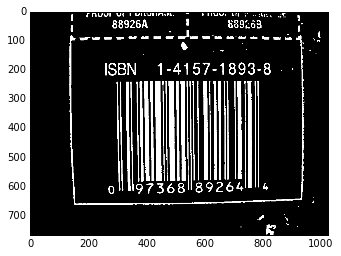

In [353]:
img_barcode_tr_cl = opening(img_barcode_tr, selem=square(3))
plt.imshow(img_barcode_tr_cl, 'gray')

Zatim je ideja izdvojiti/obeležiti regione na slici i onda nekako probati razlikovati regione koji su barkod i regione koji su slova, brojevi i okvir.

In [354]:
from skimage.measure import label  # implementacija connected-components labelling postupka
from skimage.measure import regionprops  # da možemo da dobavimo osobine svakog regiona

labeled_img = label(img_barcode_tr_cl)  # rezultat je slika sa obeleženim regionima
regions = regionprops(labeled_img)

Osobine regiona: [http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#regionprops](http://scikit-image.org/docs/dev/api/skimage.measure.html?highlight=label#regionprops)

In [355]:
print('Ukupan broj regiona: {}'.format(len(regions)))

Ukupan broj regiona: 199



**```regionprops```** funkcija vraca listu regiona sa njihovim osobinama. Sve osobine možete videti na prethodnom linku. Ono šta je karakteristično za barkod u odnosu na ostale elemente slike je da su izduženi, tj. da je odnos visine i širine relativno velik.

Da dobijemo visinu i širinu regiona možemo iskoristiti **```bbox```** osobinu (bounding box).

Nakon što izdvojimo relevantne regione, neophodno ih je iscrtati na slici, ali naravno samo njih, bez ostalih elemanata slike.

In [356]:
# utility funkcija za iscrtavanje regiona na slikama zadate velicine
def draw_regions(regs, img_size):
    img_r = np.ndarray((img_size[0], img_size[1]), dtype='float32')
    for reg in regs:
        coords = reg.coords  # coords vraca koordinate svih tacaka regiona
        for coord in coords:
            img_r[coord[0], coord[1]] = 1.
    return img_r

In [358]:
regions_barcode = []
for region in regions:
    bbox = region.bbox
    h = bbox[2] - bbox[0]  # visina
    w = bbox[3] - bbox[1]  # sirina
    if float(h) / w > 10:
        regions_barcode.append(region)

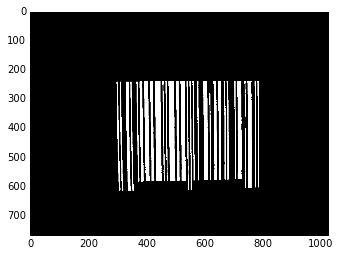

In [359]:
plt.imshow(draw_regions(regions_barcode, img_barcode_tr_cl.shape), 'gray')

Voila! :)

Ali, kako sam došao do toga da odnos visine i širine mora biti baš **10**. Opet histogram...
Hajde da prvo sačuvamo vrednosti odnosa visine i širine za svaki region.

In [360]:
ratios = []
for region in regions:
    bbox = region.bbox
    h = bbox[2] - bbox[0]  # visina
    w = bbox[3] - bbox[1]  # sirina
    ratio = float(h) / w
    ratios.append(ratio)

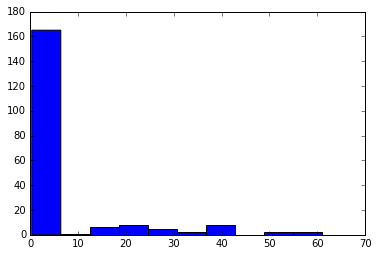

In [361]:
n, bins, patches = plt.hist(ratios, bins=10)

Sa histograma možemo zaključiti da postoji veliki broj regiona (oko 160) koji imaju odnos visine i širine manji od 10, pa možemo pretpostaviti da su to baš regioni koji nam nisu od interesa (slova, brojevi...)

PS. Naravno, u ogromnom broj slučajeva odnos visine i širine neće biti dovoljan, već se moraju koristiti i ostale osobine.

## Zadaci

* Sa slike barkoda (images/barcode.jpg) izdvojiti samo brojeve i slova, bez linija barkoda. (0.5 boda)
* Na slici sa snouborderima (images/snowboarders.jpg) prebrojati koliko ima snoubordera. (0.5 boda)

### Dodatno

* Na slici sa crvenim krvnim zrncima (images/bloodcells.jpg), prebrojati koliko ima crvenih krvnih zrnaca. (2 boda)